In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# creating data 

In [4]:
apples_data = np.random.multivariate_normal([5,7],cov =[ [3.0,0.5] , [0.5,1.2] ] ,size = 1000)

In [5]:
oranges_data = np.random.multivariate_normal([10,12],cov =[ [1.5,-0.5] , [-0.5,2.0] ] ,size = 1000)

In [39]:
test_fruit = np.array([[7,11],[10,9],[8,6],[5,4]])

# plotting the data

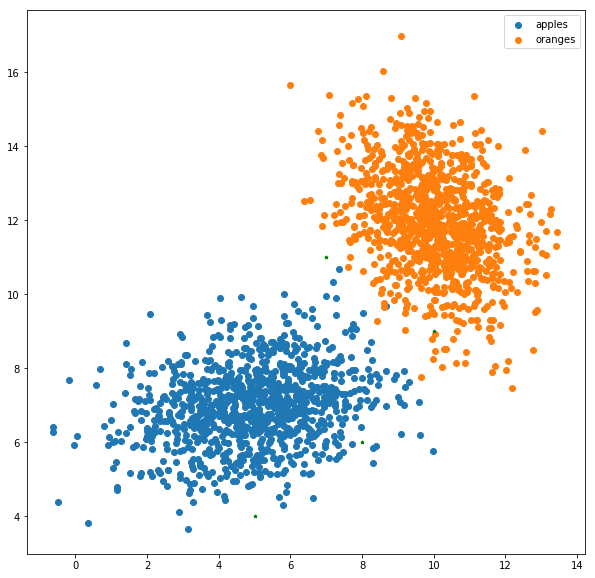

In [58]:
plt.figure(figsize=(10,10))
plt.scatter(apples_data[:,0],apples_data[:,1],label = 'apples')
plt.scatter(oranges_data[:,0],oranges_data[:,1],label = 'oranges')
plt.scatter(test_fruit[:,0],test_fruit[:,1],marker = '*',color = 'green',s = 10)
plt.legend()

# creating dataset 

In [8]:
x = np.zeros((2000,3))

In [9]:
x[:1000,:-1] = apples_data
x[1000:,:-1] = oranges_data
x[1000:,-1] = 1
x[:1000,-1] = 0
print(x)

[[ 5.36867894  6.72210964  0.        ]
 [ 5.59209509  6.59951739  0.        ]
 [ 5.36915907  6.68542406  0.        ]
 ...
 [10.10653041 12.68952188  1.        ]
 [10.90516845 10.06709411  1.        ]
 [11.19507496 10.92418927  1.        ]]


In [10]:
x_values = x[:,:-1]
y_values = x[:,-1]

In [15]:
def distance(p1,p2):
    return np.sum((p1-p2)**2)

In [53]:
def knn(X,Y,test,k = 5):
    m = X.shape[0]
    n = test.shape[0]
    pred = []

    for i in range(n):  
        d = []
        for j in range(m):
                dist = distance(test[i],X[j])
                d.append((dist,Y[j]))


        d = np.array(sorted(d))[:,1]
        d = d[:k]
        t = np.unique(d,return_counts=True)
        idx = np.argmax(t[1])
        ans = int(t[0][idx])

        if ans == 0:
            pred.append("apple")

        else:
            pred.append("orange")


    return pred

In [54]:
knn(x_values,y_values,test_fruit)

['orange', 'orange', 'apple', 'apple']